In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import math
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from scipy.stats import f_oneway


In [244]:
data=pd.read_csv("chess_games.csv",nrows=100000)
data.head()



,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Event            100000 non-null  object 
 1   White            100000 non-null  object 
 2   Black            100000 non-null  object 
 3   Result           100000 non-null  object 
 4   UTCDate          100000 non-null  object 
 5   UTCTime          100000 non-null  object 
 6   WhiteElo         100000 non-null  int64  
 7   BlackElo         100000 non-null  int64  
 8   WhiteRatingDiff  99954 non-null   float64
 9   BlackRatingDiff  99954 non-null   float64
 10  ECO              100000 non-null  object 
 11  Opening          100000 non-null  object 
 12  TimeControl      100000 non-null  object 
 13  Termination      100000 non-null  object 
 14  AN               100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [246]:
data["Opening"].describe()

count                   100000
unique                    2087
top       Van't Kruijs Opening
freq                      2064
Name: Opening, dtype: object

In [247]:
print(data["AN"].value_counts())
print(data["ECO"].value_counts())
print(data["Result"].value_counts())
print(data["TimeControl"].value_counts())

AN
1. e4 1-0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [248]:
numeric_columns = ['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)
list(data.columns)
data=pd.get_dummies(data,columns=['Result'])
data.head(25)

                 WhiteElo  BlackElo  WhiteRatingDiff  BlackRatingDiff
WhiteElo         1.000000  0.709161        -0.016061         0.036397
BlackElo         0.709161  1.000000         0.029986        -0.013017
WhiteRatingDiff -0.016061  0.029986         1.000000        -0.362122
BlackRatingDiff  0.036397 -0.013017        -0.362122         1.000000


,Event,White,Black,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,Result_0-1,Result_1-0,Result_1/2-1/2
0,Classical,eisaaaa,HAMID449,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,False,True,False
1,Blitz,go4jas,Sergei1973,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...,True,False,False
2,Blitz tournament,Evangelistaizac,kafune,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....,False,True,False
3,Correspondence,Jvayne,Wsjvayne,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...,False,True,False
4,Blitz tournament,kyoday,BrettDale,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,True,False,False
5,Blitz tournament,lucaseixasouza,diguim,2016.06.30,22:00:02,1773,1809,-10.0,10.0,C27,Vienna Game,180+0,Normal,1. e4 e5 2. Nc3 d6 3. Nf3 h6 4. Bc4 c6 5. b3 Q...,True,False,False
6,Blitz tournament,RENZZO77,HeadlessChicken,2016.06.30,22:00:02,1895,1886,-12.0,12.0,B10,Caro-Kann Defense: Two Knights Attack,180+0,Time forfeit,1. e4 c6 2. Nf3 d5 3. Nc3 dxe4 4. Nxe4 Nf6 5. ...,True,False,False
7,Blitz tournament,ipero,Bayern123,2016.06.30,22:00:02,2155,2356,20.0,-20.0,D02,Queen's Pawn Game: London System,180+0,Normal,1. d4 d5 2. Nf3 Nf6 3. Bf4 c6 4. e3 Bg4 5. Be2...,False,True,False
8,Blitz tournament,Loginov19510410,Kereshu,2016.06.30,22:00:02,2010,2111,-9.0,9.0,A45,Indian Game,300+0,Normal,1. d4 Nf6 2. Bf4 e6 3. e3 d5 4. Nf3 h6 5. Bd3 ...,True,False,False
9,Blitz tournament,Shambobala,cernunnoss,2016.06.30,22:00:02,1764,1773,12.0,-12.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Nf6 4. Be2 c6 5. ...,False,True,False


C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\thoma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


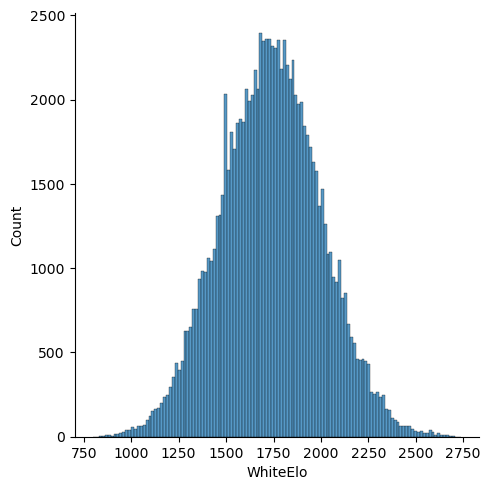

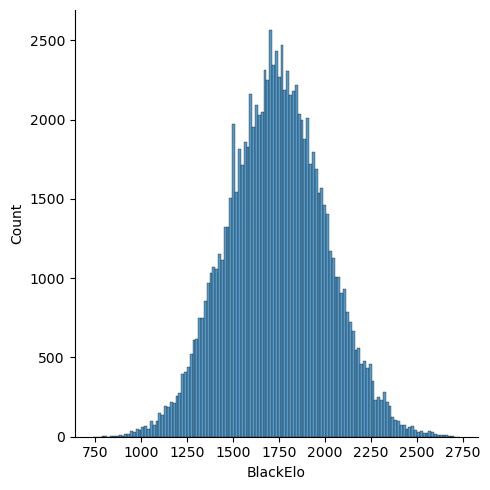

In [183]:
sp_untransformed = sns.displot(data['WhiteElo'])
sp_untransformed = sns.displot(data['BlackElo'])


In [184]:
print("Skewness: %f" % data['WhiteElo'].skew())
print("Skewness: %f" % data['BlackElo'].skew())

Skewness: 0.047773
Skewness: 0.043892


In [185]:
drop= data.drop_duplicates()
drop

,Event,White,Black,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,Result_0-1,Result_1-0,Result_1/2-1/2
0,Classical,eisaaaa,HAMID449,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,False,True,False
1,Blitz,go4jas,Sergei1973,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...,True,False,False
2,Blitz tournament,Evangelistaizac,kafune,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....,False,True,False
3,Correspondence,Jvayne,Wsjvayne,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...,False,True,False
4,Blitz tournament,kyoday,BrettDale,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Classical,users7777,Drex78,2016.07.01,13:04:17,1828,1989,-7.0,7.0,A40,Modern Defense,900+0,Normal,1. d4 g6 2. d5 Bg7 3. e4 d6 4. f4 Nf6 5. Bd3 O...,True,False,False
99996,Bullet,Polol,honorarycitizen,2016.07.01,13:04:16,2128,2040,-17.0,11.0,A40,Horwitz Defense,30+0,Normal,1. d4 e6 2. c3 c5 3. e3 cxd4 4. cxd4 d5 5. Nf3...,True,False,False
99997,Bullet,milanbelobrk,goblin123,2016.07.01,13:04:15,2074,2056,-12.0,11.0,A00,Van't Kruijs Opening,60+1,Normal,1. e3 c5 2. d4 cxd4 3. exd4 d5 4. Nf3 Nf6 5. B...,True,False,False
99998,Bullet,reyprato,GARAGIN13,2016.07.01,13:04:15,1464,1533,-9.0,9.0,B07,Pirc Defense #4,120+0,Normal,1. e4 d6 2. Nf3 Nf6 3. Bc4 Nxe4 4. d3 Nf6 5. B...,True,False,False


In [186]:
total = data.isnull().sum().sort_values(ascending=False)
total2=total.head(20)
total2

BlackRatingDiff    46
WhiteRatingDiff    46
ECO                 0
Result_1-0          0
Result_0-1          0
AN                  0
Termination         0
TimeControl         0
Opening             0
Event               0
White               0
BlackElo            0
WhiteElo            0
UTCTime             0
UTCDate             0
Black               0
Result_1/2-1/2      0
dtype: int64

In [187]:
data=data.dropna(subset=["WhiteRatingDiff"])
data=data.dropna(subset=["BlackRatingDiff"])

In [188]:
data['NOS'] = data['AN'].apply(lambda x: len(x.split('.'))-1)
data['MeanElo']=(data['WhiteElo']+data['BlackElo'])/2

In [189]:
data.head(50)

,Event,White,Black,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,Result_0-1,Result_1-0,Result_1/2-1/2,NOS,MeanElo
0,Classical,eisaaaa,HAMID449,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,False,True,False,38,1898.5
1,Blitz,go4jas,Sergei1973,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...,True,False,False,24,1634.0
2,Blitz tournament,Evangelistaizac,kafune,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....,False,True,False,31,1667.5
3,Correspondence,Jvayne,Wsjvayne,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...,False,True,False,31,1511.5
4,Blitz tournament,kyoday,BrettDale,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,True,False,False,52,1922.5
5,Blitz tournament,lucaseixasouza,diguim,2016.06.30,22:00:02,1773,1809,-10.0,10.0,C27,Vienna Game,180+0,Normal,1. e4 e5 2. Nc3 d6 3. Nf3 h6 4. Bc4 c6 5. b3 Q...,True,False,False,43,1791.0
6,Blitz tournament,RENZZO77,HeadlessChicken,2016.06.30,22:00:02,1895,1886,-12.0,12.0,B10,Caro-Kann Defense: Two Knights Attack,180+0,Time forfeit,1. e4 c6 2. Nf3 d5 3. Nc3 dxe4 4. Nxe4 Nf6 5. ...,True,False,False,64,1890.5
7,Blitz tournament,ipero,Bayern123,2016.06.30,22:00:02,2155,2356,20.0,-20.0,D02,Queen's Pawn Game: London System,180+0,Normal,1. d4 d5 2. Nf3 Nf6 3. Bf4 c6 4. e3 Bg4 5. Be2...,False,True,False,71,2255.5
8,Blitz tournament,Loginov19510410,Kereshu,2016.06.30,22:00:02,2010,2111,-9.0,9.0,A45,Indian Game,300+0,Normal,1. d4 Nf6 2. Bf4 e6 3. e3 d5 4. Nf3 h6 5. Bd3 ...,True,False,False,56,2060.5
9,Blitz tournament,Shambobala,cernunnoss,2016.06.30,22:00:02,1764,1773,12.0,-12.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Nf6 4. Be2 c6 5. ...,False,True,False,43,1768.5


In [190]:
data.drop(data[(data['NOS']<4)&(data['Termination']=='Abandoned')].index,inplace=True)

In [191]:
data

,Event,White,Black,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,Result_0-1,Result_1-0,Result_1/2-1/2,NOS,MeanElo
0,Classical,eisaaaa,HAMID449,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,False,True,False,38,1898.5
1,Blitz,go4jas,Sergei1973,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...,True,False,False,24,1634.0
2,Blitz tournament,Evangelistaizac,kafune,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....,False,True,False,31,1667.5
3,Correspondence,Jvayne,Wsjvayne,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...,False,True,False,31,1511.5
4,Blitz tournament,kyoday,BrettDale,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,True,False,False,52,1922.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Classical,users7777,Drex78,2016.07.01,13:04:17,1828,1989,-7.0,7.0,A40,Modern Defense,900+0,Normal,1. d4 g6 2. d5 Bg7 3. e4 d6 4. f4 Nf6 5. Bd3 O...,True,False,False,73,1908.5
99996,Bullet,Polol,honorarycitizen,2016.07.01,13:04:16,2128,2040,-17.0,11.0,A40,Horwitz Defense,30+0,Normal,1. d4 e6 2. c3 c5 3. e3 cxd4 4. cxd4 d5 5. Nf3...,True,False,False,39,2084.0
99997,Bullet,milanbelobrk,goblin123,2016.07.01,13:04:15,2074,2056,-12.0,11.0,A00,Van't Kruijs Opening,60+1,Normal,1. e3 c5 2. d4 cxd4 3. exd4 d5 4. Nf3 Nf6 5. B...,True,False,False,42,2065.0
99998,Bullet,reyprato,GARAGIN13,2016.07.01,13:04:15,1464,1533,-9.0,9.0,B07,Pirc Defense #4,120+0,Normal,1. e4 d6 2. Nf3 Nf6 3. Bc4 Nxe4 4. d3 Nf6 5. B...,True,False,False,27,1498.5


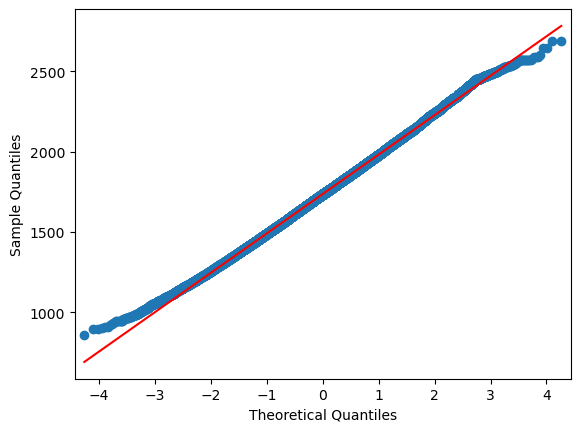

In [192]:
data2=data['MeanElo']
fig = sm.qqplot(data2,line="s")
#Normality test with QQ-plot
plt.show()

In [193]:
data['Opening'].value_counts()

Opening
Van't Kruijs Opening                                             2055
Scandinavian Defense: Mieses-Kotroc Variation                    1854
Modern Defense                                                   1613
Horwitz Defense                                                  1485
Sicilian Defense                                                 1402
                                                                 ... 
Blackmar-Diemer Gambit Declined, Elbert Countergambit               1
Russian Game: Moody Gambit                                          1
Benko Gambit Declined, Quiet Line                                   1
Ruy Lopez: Brentano Gambit                                          1
Bishop's Opening: Calabrese Countergambit, Jaenisch Variation       1
Name: count, Length: 2085, dtype: int64

In [194]:
openings_stats = data.groupby('Opening')[['Result_1-0', 'Result_0-1']].mean() * 100
openings_stats

,Result_1-0,Result_0-1
Opening,,
Alekhine Defense,54.022989,42.528736
Alekhine Defense #2,53.521127,45.070423
Alekhine Defense #3,26.666667,73.333333
Alekhine Defense: Balogh Variation,52.941176,47.058824
Alekhine Defense: Brooklyn Variation,16.666667,83.333333
...,...,...
Zukertort Opening: Tennison Gambit,48.726115,49.681529
Zukertort Opening: The Walrus,100.000000,0.000000
Zukertort Opening: Vos Gambit,55.000000,40.000000


In [195]:

openings_stats = data.groupby('Opening').agg({
    'Result_1-0': 'mean',
    'Result_0-1': 'mean',
    'Opening': 'count'  # Compter le nombre de parties
}).rename(columns={'Opening': 'GamesPlayed'})

# Convertir les pourcentages en pourcentage
openings_stats[['Result_1-0', 'Result_0-1']] *= 100

In [197]:
openings_stats

,Result_1-0,Result_0-1,GamesPlayed
Opening,,,
Alekhine Defense,54.022989,42.528736,174
Alekhine Defense #2,53.521127,45.070423,71
Alekhine Defense #3,26.666667,73.333333,15
Alekhine Defense: Balogh Variation,52.941176,47.058824,17
Alekhine Defense: Brooklyn Variation,16.666667,83.333333,12
...,...,...,...
Zukertort Opening: Tennison Gambit,48.726115,49.681529,314
Zukertort Opening: The Walrus,100.000000,0.000000,1
Zukertort Opening: Vos Gambit,55.000000,40.000000,20


In [198]:
data['RealEloDiff']=abs((data['WhiteElo']-data['BlackElo']))

In [199]:
data

,Event,White,Black,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,Result_0-1,Result_1-0,Result_1/2-1/2,NOS,MeanElo,RealEloDiff
0,Classical,eisaaaa,HAMID449,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,False,True,False,38,1898.5,5
1,Blitz,go4jas,Sergei1973,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...,True,False,False,24,1634.0,14
2,Blitz tournament,Evangelistaizac,kafune,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....,False,True,False,31,1667.5,41
3,Correspondence,Jvayne,Wsjvayne,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...,False,True,False,31,1511.5,389
4,Blitz tournament,kyoday,BrettDale,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,True,False,False,52,1922.5,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Classical,users7777,Drex78,2016.07.01,13:04:17,1828,1989,-7.0,7.0,A40,Modern Defense,900+0,Normal,1. d4 g6 2. d5 Bg7 3. e4 d6 4. f4 Nf6 5. Bd3 O...,True,False,False,73,1908.5,161
99996,Bullet,Polol,honorarycitizen,2016.07.01,13:04:16,2128,2040,-17.0,11.0,A40,Horwitz Defense,30+0,Normal,1. d4 e6 2. c3 c5 3. e3 cxd4 4. cxd4 d5 5. Nf3...,True,False,False,39,2084.0,88
99997,Bullet,milanbelobrk,goblin123,2016.07.01,13:04:15,2074,2056,-12.0,11.0,A00,Van't Kruijs Opening,60+1,Normal,1. e3 c5 2. d4 cxd4 3. exd4 d5 4. Nf3 Nf6 5. B...,True,False,False,42,2065.0,18
99998,Bullet,reyprato,GARAGIN13,2016.07.01,13:04:15,1464,1533,-9.0,9.0,B07,Pirc Defense #4,120+0,Normal,1. e4 d6 2. Nf3 Nf6 3. Bc4 Nxe4 4. d3 Nf6 5. B...,True,False,False,27,1498.5,69


In [201]:
#FIRST HYPOTHESIS 
#we set H0: GAMES ARE LONGER WHEN THE ELO DIFFERENCE IS ABOVE A CERTAIN TRESHOLD.
#we set H1: there is no difference in game length when the difference in elo is above a certain treshold


data['EloDiff0-10'] = (abs(data['WhiteElo'] - data['BlackElo']) > 0)&(abs(data['WhiteElo'] - data['BlackElo']) < 10)
data['EloDiff10-20'] = (abs(data['WhiteElo'] - data['BlackElo']) > 10)&(abs(data['WhiteElo'] - data['BlackElo']) < 20)
data['EloDiff20-50'] = (abs(data['WhiteElo'] - data['BlackElo']) > 20)&(abs(data['WhiteElo'] - data['BlackElo']) < 50)
data['EloDiff50-100'] = (abs(data['WhiteElo'] - data['BlackElo']) > 50)&(abs(data['WhiteElo'] - data['BlackElo']) < 100)
data['EloDiffAbove100'] = (abs(data['WhiteElo'] - data['BlackElo']) > 100)



In [202]:
f=data.groupby(['EloDiff0-10'])['NOS'].mean()
f1=data.groupby(['EloDiff10-20'])['NOS'].mean()
f2=data.groupby(['EloDiff20-50'])['NOS'].mean()
f3=data.groupby(['EloDiff50-100'])['NOS'].mean()
f4=data.groupby(['EloDiffAbove100'])['NOS'].mean()



In [203]:
print(f)
print(f1)
print(f2)
print(f3)
print(f4)

EloDiff0-10
False    52.967418
True     52.949410
Name: NOS, dtype: float64
EloDiff10-20
False    52.916967
True     53.899026
Name: NOS, dtype: float64
EloDiff20-50
False    52.90376
True     53.31607
Name: NOS, dtype: float64
EloDiff50-100
False    53.123013
True     52.362258
Name: NOS, dtype: float64
EloDiffAbove100
False    52.992563
True     52.942336
Name: NOS, dtype: float64


In [204]:
f_stat, p_value = f_oneway(f,f1,f2,f3,f4)

# Display the results
print(f'ANOVA results: F-statistic = {f_stat}, p-value = {p_value}')

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print('The difference in average number of moves is statistically significant across at least one group.')
else:
    print('There is no statistically significant difference in average number of moves across groups.')

ANOVA results: F-statistic = 0.7010872933162233, p-value = 0.6236698593540704
There is no statistically significant difference in average number of moves across groups.


In [205]:
#Therefore, based on the result we obtained (p-value = 0.62), we would not reject the null hypothesis, 
#and we might conclude that there is no statistically significant difference in the average number of moves when 
#the Elo difference is above the specified thresholds.


In [206]:
data

,Event,White,Black,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,...,Result_1-0,Result_1/2-1/2,NOS,MeanElo,RealEloDiff,EloDiff0-10,EloDiff10-20,EloDiff20-50,EloDiff50-100,EloDiffAbove100
0,Classical,eisaaaa,HAMID449,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,...,True,False,38,1898.5,5,True,False,False,False,False
1,Blitz,go4jas,Sergei1973,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,...,False,False,24,1634.0,14,False,True,False,False,False
2,Blitz tournament,Evangelistaizac,kafune,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,...,True,False,31,1667.5,41,False,False,True,False,False
3,Correspondence,Jvayne,Wsjvayne,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,...,True,False,31,1511.5,389,False,False,False,False,True
4,Blitz tournament,kyoday,BrettDale,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,...,False,False,52,1922.5,45,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Classical,users7777,Drex78,2016.07.01,13:04:17,1828,1989,-7.0,7.0,A40,...,False,False,73,1908.5,161,False,False,False,False,True
99996,Bullet,Polol,honorarycitizen,2016.07.01,13:04:16,2128,2040,-17.0,11.0,A40,...,False,False,39,2084.0,88,False,False,False,True,False
99997,Bullet,milanbelobrk,goblin123,2016.07.01,13:04:15,2074,2056,-12.0,11.0,A00,...,False,False,42,2065.0,18,False,True,False,False,False
99998,Bullet,reyprato,GARAGIN13,2016.07.01,13:04:15,1464,1533,-9.0,9.0,B07,...,False,False,27,1498.5,69,False,False,False,True,False


In [208]:
data['Result_1-0'].value_counts()

Result_1-0
False    50269
True     49447
Name: count, dtype: int64

In [214]:
data=data.drop(columns=['White'])
data=data.drop(columns=['Black'])

In [215]:
data

,Event,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,...,Result_1-0,Result_1/2-1/2,NOS,MeanElo,RealEloDiff,EloDiff0-10,EloDiff10-20,EloDiff20-50,EloDiff50-100,EloDiffAbove100
0,Classical,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,...,True,False,38,1898.5,5,True,False,False,False,False
1,Blitz,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,...,False,False,24,1634.0,14,False,True,False,False,False
2,Blitz tournament,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,...,True,False,31,1667.5,41,False,False,True,False,False
3,Correspondence,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,...,True,False,31,1511.5,389,False,False,False,False,True
4,Blitz tournament,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,...,False,False,52,1922.5,45,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Classical,2016.07.01,13:04:17,1828,1989,-7.0,7.0,A40,Modern Defense,900+0,...,False,False,73,1908.5,161,False,False,False,False,True
99996,Bullet,2016.07.01,13:04:16,2128,2040,-17.0,11.0,A40,Horwitz Defense,30+0,...,False,False,39,2084.0,88,False,False,False,True,False
99997,Bullet,2016.07.01,13:04:15,2074,2056,-12.0,11.0,A00,Van't Kruijs Opening,60+1,...,False,False,42,2065.0,18,False,True,False,False,False
99998,Bullet,2016.07.01,13:04:15,1464,1533,-9.0,9.0,B07,Pirc Defense #4,120+0,...,False,False,27,1498.5,69,False,False,False,True,False


In [225]:
data['EloUnder1000-1500']=((data['MeanElo']>1000)&(data['MeanElo']<1500))
data['EloUnder1500-2000']=((data['MeanElo']>1500)&(data['MeanElo']<2000))
data['EloOver2000']=(data['MeanElo']>2000)

In [226]:
print(data['EloUnder1000'].value_counts())
print(data['EloUnder1000-1500'].value_counts())
print(data['EloUnder1500-2000'].value_counts())
print(data['EloOver2000'].value_counts())


EloUnder1000
False    99663
True        53
Name: count, dtype: int64
EloUnder1000-1500
False    82947
True     16769
Name: count, dtype: int64
EloUnder1500-2000
True     68691
False    31025
Name: count, dtype: int64
EloOver2000
False    85655
True     14061
Name: count, dtype: int64


In [229]:
data

,Event,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,...,RealEloDiff,EloDiff0-10,EloDiff10-20,EloDiff20-50,EloDiff50-100,EloDiffAbove100,EloUnder1000,EloUnder1000-1500,EloUnder1500-2000,EloOver2000
0,Classical,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,...,5,True,False,False,False,False,False,False,True,False
1,Blitz,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,...,14,False,True,False,False,False,False,False,True,False
2,Blitz tournament,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,...,41,False,False,True,False,False,False,False,True,False
3,Correspondence,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,...,389,False,False,False,False,True,False,False,True,False
4,Blitz tournament,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,...,45,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Classical,2016.07.01,13:04:17,1828,1989,-7.0,7.0,A40,Modern Defense,900+0,...,161,False,False,False,False,True,False,False,True,False
99996,Bullet,2016.07.01,13:04:16,2128,2040,-17.0,11.0,A40,Horwitz Defense,30+0,...,88,False,False,False,True,False,False,False,False,True
99997,Bullet,2016.07.01,13:04:15,2074,2056,-12.0,11.0,A00,Van't Kruijs Opening,60+1,...,18,False,True,False,False,False,False,False,False,True
99998,Bullet,2016.07.01,13:04:15,1464,1533,-9.0,9.0,B07,Pirc Defense #4,120+0,...,69,False,False,False,True,False,False,True,False,False
